<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/hpdp/3H/library_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 7: Comparison between libraries (Dask)

### Group Members

**Group Name:** 3H

| Name                                     | Matrix Number | Task |
| :---------------------------------------- | :-------------: | ------------- |
| ALIEYA ZAWANIE BINTI A ZAINI | A21EC0156 | MODIN
| MOHAMAD AZRI HADIF BIN MOHAMMAD RIZAL | A21EC0054 | DASK
| IZZAT HAQEEMI BIN HAIRUDIN | A21EC0033 | PANDAS
| ALIYA ZARENA BINTI ZAINULANUAR | A21EC0013 | COMPARISON  

# Dataset Selection
## About Dataset
Comprehensive Analysis of Brewing Parameters, Sales Trends, and Quality Metrics in Craft Beer Production (2020-2024)

Dataset Link: [Brewery Operations and Market Analysis Dataset](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset/data)

## Overview
This dataset presents an extensive collection of data from a craft beer brewery, spanning from January 2020 to January 2024. It encapsulates a rich blend of brewing parameters, sales data, and quality assessments, providing a holistic view of the brewing process and its market implications.

## Content Details:

- Brewing Parameters: Includes crucial brewing factors such as fermentation time, temperature, pH level, gravity, and ingredient ratios. These parameters are pivotal in understanding the brewing process and its impact on the final product.
- Beer Styles and Packaging: The dataset categorizes beers into various styles like IPA, Stout, Lager, etc., and records the type of packaging used (kegs, bottles, cans, pints).
- Quality Scores: Each batch is rated for its quality on a scale, offering insights into the success and consistency of different brewing approaches.
Sales Data: Detailed records of sales figures, providing a window into the market performance of different beer types across various locations in Bangalore.
- Supply Chain and Efficiency Metrics: Tracks aspects like volume produced, total sales, brewhouse efficiency, and losses at different stages (brewing, fermentation, bottling/kegging), crucial for supply chain analysis and operational optimization.
Applications:
- Brewing Process Optimization: Ideal for analysis aiming to correlate brewing techniques with beer quality, facilitating the optimization of brewing conditions for superior product quality.
- Market Analysis: Sales data across different styles and locations offer valuable insights for market trend analysis and strategic planning.
- Supply Chain Management: The dataset is instrumental in identifying bottlenecks in the supply chain and enhancing inventory management strategies.
- Quality Assessment and Control: By analyzing quality scores against brewing parameters, the dataset supports initiatives in quality control and consistency maintenance.
- Data Format and Structure:
    - The dataset is structured in a tabular format, provided in a CSV file for easy integration with various data analysis tools.
    - It comprises over 10 million records, each representing a unique batch with a comprehensive set of features.
- Intended Audience:
This dataset is invaluable for data scientists, brewing process engineers, market analysts, supply chain experts, and quality control professionals in the brewing industry. It is also highly relevant for academic research in food technology, fermentation science, and business analytics.

**Disclaimer:**
- The data is synthetic and intended for educational, analytical, and simulation purposes.
- Users are advised to apply appropriate data processing and analysis techniques for meaningful insights.


*This comprehensive dataset serves as a rich resource for exploring the intricacies of brewing science, market dynamics, and operational efficiency in the craft beer industry.*


## Import Dataset

In [ ]:
from google.colab import files
files.upload()

!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

Saving kaggle.json to kaggle.json
100% 1.06G/1.06G [00:08<00:00, 294MB/s]
100% 1.06G/1.06G [00:08<00:00, 131MB/s]


In [ ]:
! unzip brewery-operations-and-market-analysis-dataset.zip

Archive:  brewery-operations-and-market-analysis-dataset.zip
  inflating: brewery_data_complete_extended.csv  


## Import Necessary Library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Big Data Operation

In [ ]:
!pip install dask

Read file using dask dataframe

In [ ]:
import dask.dataframe as dd

In [ ]:
file_path = 'brewery_data_complete_extended.csv'

Chunk data with chunk size of 100000 and inspect the time it take

In [ ]:
import time

# Define chunk size and file path
chunk_size = 100000

start_time = time.time()

dask_df = dd.read_csv(file_path, chunk_size)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

Total elapsed time: 0.991070032119751 seconds


In [ ]:
dask_df.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


Check the memory usage

In [ ]:
selected_columns = ["Beer_Style", "Location", "SKU", "Fermentation_Time", "Temperature", "pH_Level",
                    "Gravity", "Alcohol_Content", "Quality_Score", "Total_Sales", "Brewhouse_Efficiency"]
mdf = dask_df[selected_columns]


start_time_info = time.time()
mdf.info(verbose=False, memory_usage="deep")
end_time_info = time.time()

elapsed_time_info = end_time_info - start_time_info
print("\nTime taken to run the info operation: {:.2f} seconds".format(elapsed_time_info))

<class 'dask.dataframe.core.DataFrame'>
Columns: 11 entries, Beer_Style to Brewhouse_Efficiency
dtypes: object(3), float64(7), int64(1)
memory usage: 842.4 MB

Time taken to run the info operation: 244.94 seconds


In [ ]:
dask_df.info(memory_usage="deep")

<class 'dask.dataframe.core.DataFrame'>
Columns: 20 entries, Batch_ID to Loss_During_Bottling_Kegging
dtypes: object(5), float64(10), int64(5)
memory usage: 1.5 GB


Check data types for each column

In [ ]:
dask_df.dtypes

Batch_ID                          int64
Brew_Date                        object
Beer_Style                       object
SKU                              object
Location                         object
Fermentation_Time                 int64
Temperature                     float64
pH_Level                        float64
Gravity                         float64
Alcohol_Content                 float64
Bitterness                        int64
Color                             int64
Ingredient_Ratio                 object
Volume_Produced                   int64
Total_Sales                     float64
Quality_Score                   float64
Brewhouse_Efficiency            float64
Loss_During_Brewing             float64
Loss_During_Fermentation        float64
Loss_During_Bottling_Kegging    float64
dtype: object

Check if the dataset have any null values

In [ ]:
result = dask_df.isnull().any().sum().compute()
print(f'Null Values: {result}')

Null Values: 0


Import necessary library for graph plotting

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
sampled_mdf = dask_df.compute()

In [ ]:
def reduce_mem_usage_dask(df):
    start_time = time.time()

    # Calculate memory usage before optimization
    mem_before = df.memory_usage(deep=True).sum().compute() / 1024**2

    # Optimize the DataFrame
    df = dd.from_pandas(df.compute(), npartitions=1)  # Convert to Dask DataFrame for optimization
    df = df.categorize()

    # Calculate memory usage after optimization
    mem_after = df.memory_usage(deep=True).sum().compute() / 1024**2

    # Calculate the percentage decrease in memory usage
    percent_decrease = ((mem_before - mem_after) / mem_before) * 100

    end_time = time.time()

    time_taken = end_time - start_time

    print(f"Memory usage before optimization: {mem_before:.2f} MB")
    print(f"Memory usage after optimization: {mem_after:.2f} MB")
    print(f"Decreased by: {percent_decrease:.2f}%")
    print(f"Time taken: {time_taken:.2f} seconds")

reduce_mem_usage_dask(dask_df)

Memory usage before optimization: 4354.57 MB
Memory usage after optimization: 2261.44 MB
Decreased by: 48.07%
Time taken: 412.90 seconds


# Exploratory Data Analysis

## Discriptive statistics

In [ ]:
start_time = time.time()

numeric_stats = sampled_mdf.describe()
print(numeric_stats)

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTotal elapsed time: {:.2f} seconds".format(elapsed_time))

           Batch_ID  Fermentation_Time   Temperature      pH_Level  \
count  1.000000e+07       1.000000e+07  1.000000e+07  1.000000e+07   
mean   5.000000e+06       1.450090e+01  1.999990e+01  4.999941e+00   
std    2.886751e+06       2.872006e+00  2.887030e+00  2.886376e-01   
min    0.000000e+00       1.000000e+01  1.500000e+01  4.500000e+00   
25%    2.500000e+06       1.200000e+01  1.749984e+01  4.750040e+00   
50%    5.000000e+06       1.500000e+01  1.999977e+01  4.999885e+00   
75%    7.499999e+06       1.700000e+01  2.250076e+01  5.249937e+00   
max    9.999999e+06       1.900000e+01  2.500000e+01  5.500000e+00   

            Gravity  Alcohol_Content    Bitterness         Color  \
count  1.000000e+07     1.000000e+07  1.000000e+07  1.000000e+07   
mean   1.055003e+00     5.249709e+00  3.949620e+01  1.199935e+01   
std    1.443465e-02     4.329614e-01  1.154557e+01  4.321170e+00   
min    1.030000e+00     4.500000e+00  2.000000e+01  5.000000e+00   
25%    1.042502e+00     4.874

## Distribution of numerical features

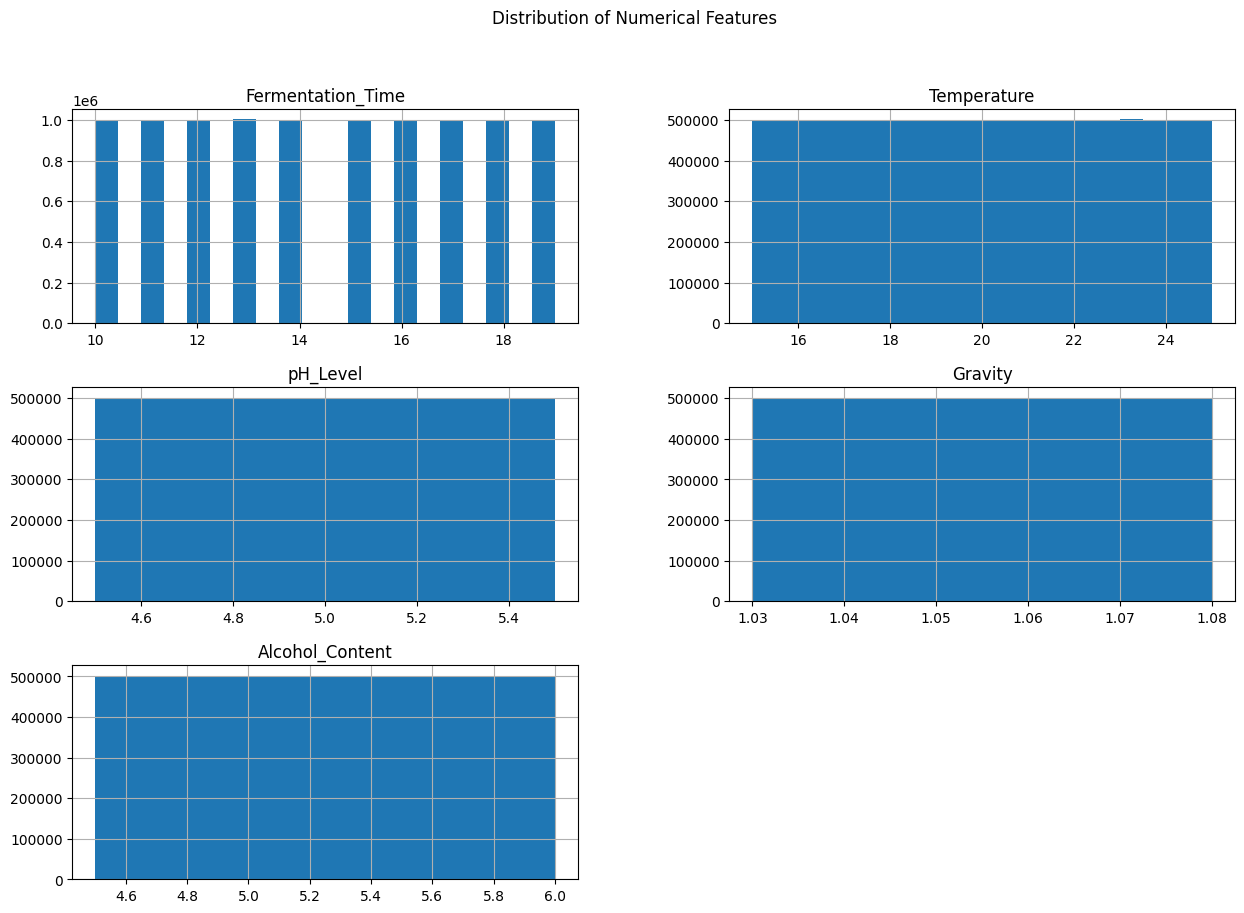


Total elapsed time: 1.63 seconds


In [ ]:
start_time = time.time()

num_cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content']
sampled_mdf[num_cols].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time

print("\nTotal elapsed time: {:.2f} seconds".format(elapsed_time))

## Scatter Plot between pH Level and Alcohol Content by Beer Style (Sampled Data)

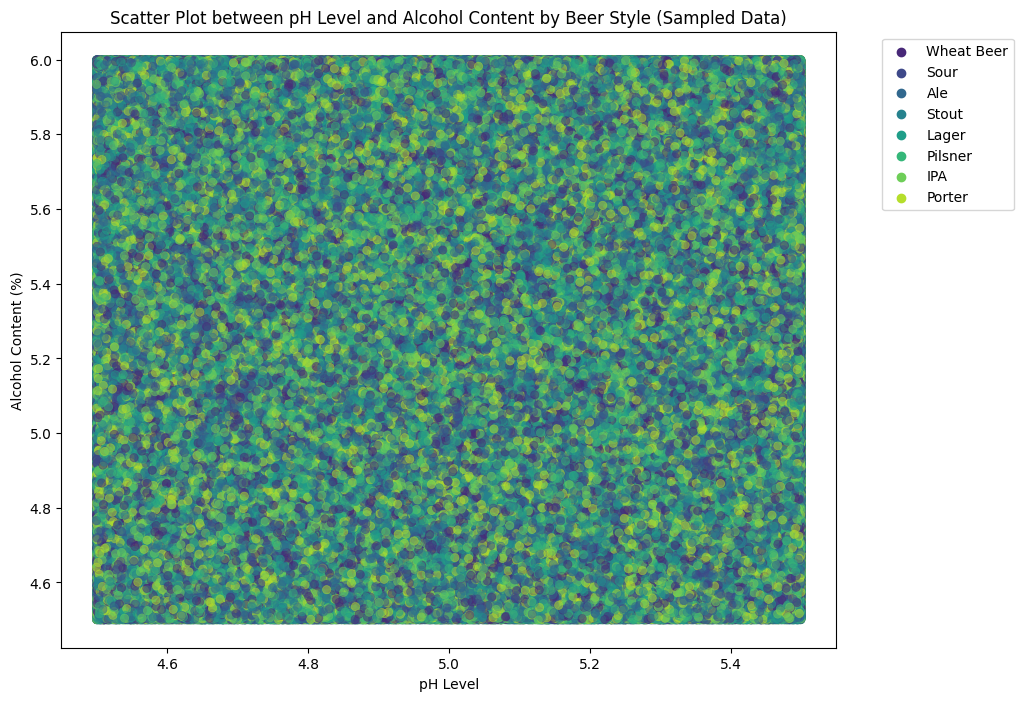

Total elapsed time: 193.07288551330566 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pH_Level', y='Alcohol_Content', data=sampled_mdf, alpha=0.5, hue='Beer_Style', palette='viridis', edgecolor=None)
plt.title('Scatter Plot between pH Level and Alcohol Content by Beer Style (Sampled Data)')
plt.xlabel('pH Level')
plt.ylabel('Alcohol Content (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Display legend outside the plot
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Distribution of Fermentation Time for Each Beer Style (Sampled Data)

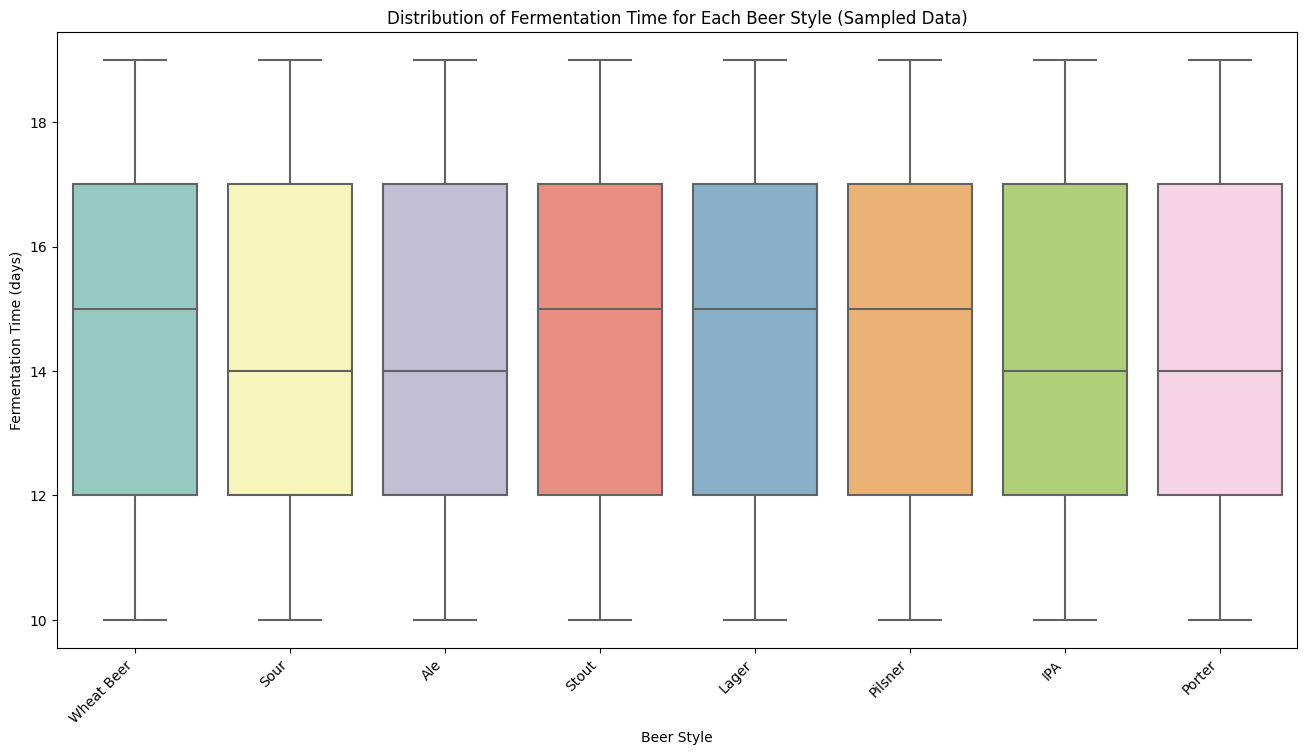

Total elapsed time: 3.965447187423706 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(16, 8))
sns.boxplot(x='Beer_Style', y='Fermentation_Time', data=sampled_mdf, palette='Set3')
plt.title('Distribution of Fermentation Time for Each Beer Style (Sampled Data)')
plt.xlabel('Beer Style')
plt.ylabel('Fermentation Time (days)')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Alcohol Content (%)

<Figure size 1600x800 with 0 Axes>

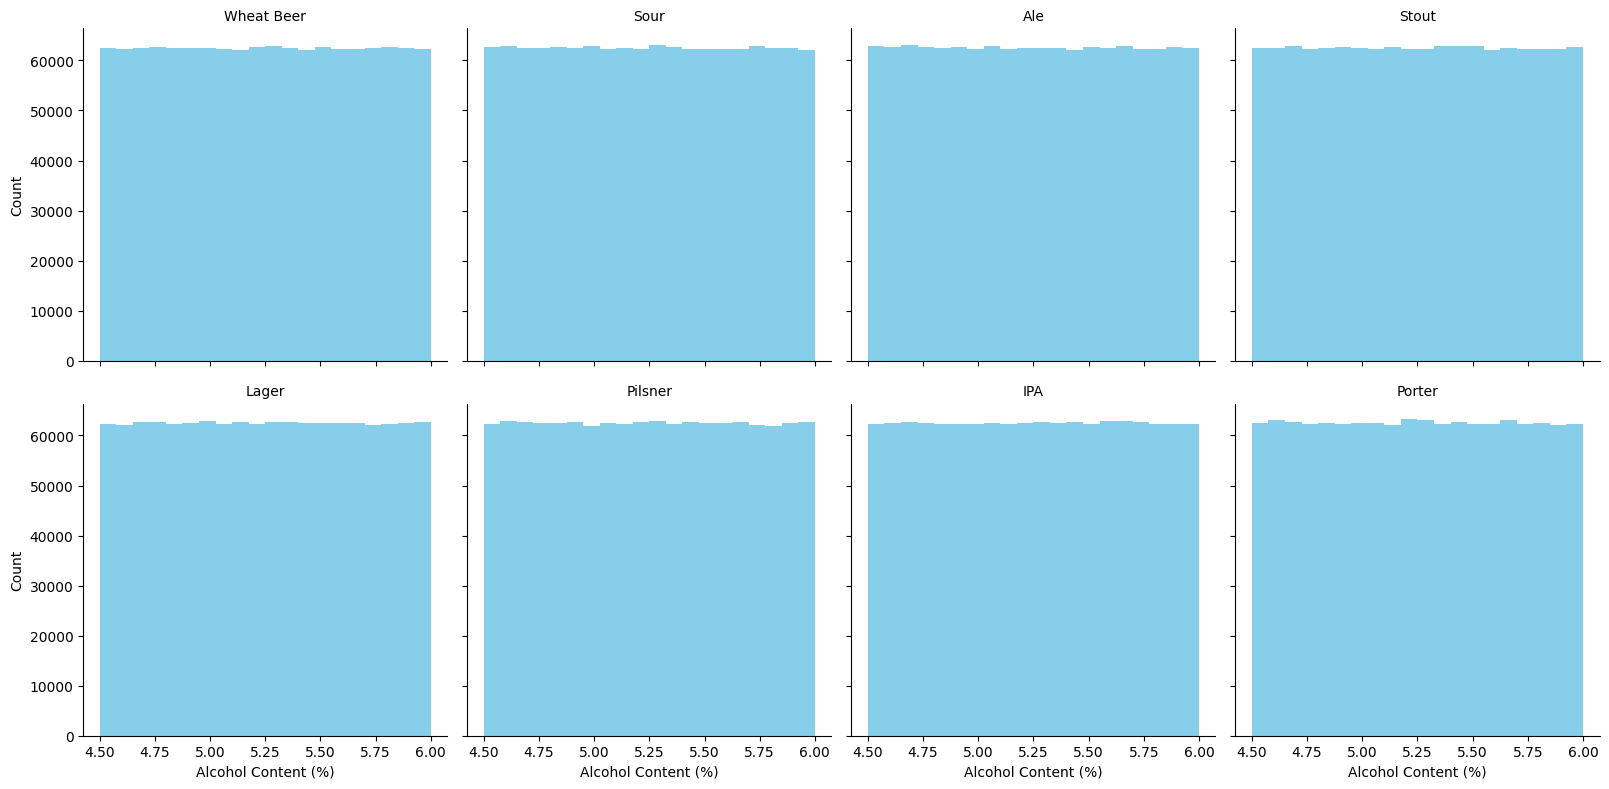

Total elapsed time: 17.495635986328125 seconds


In [ ]:
start_time = time.time()

plt.figure(figsize=(16, 8))
g = sns.FacetGrid(sampled_mdf, col='Beer_Style', col_wrap=4, height=4)
g.map(plt.hist, 'Alcohol_Content', bins=20, color='skyblue')
g.set_axis_labels('Alcohol Content (%)', 'Count')
g.set_titles(col_template='{col_name}')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Average Alcohol Content for Each Beer Style

   Beer_Style  Alcohol_Content
0         Ale         5.249216
1         IPA         5.250116
2       Lager         5.250009
3     Pilsner         5.249688
4      Porter         5.249617
5        Sour         5.249277
6       Stout         5.249833
7  Wheat Beer         5.249916


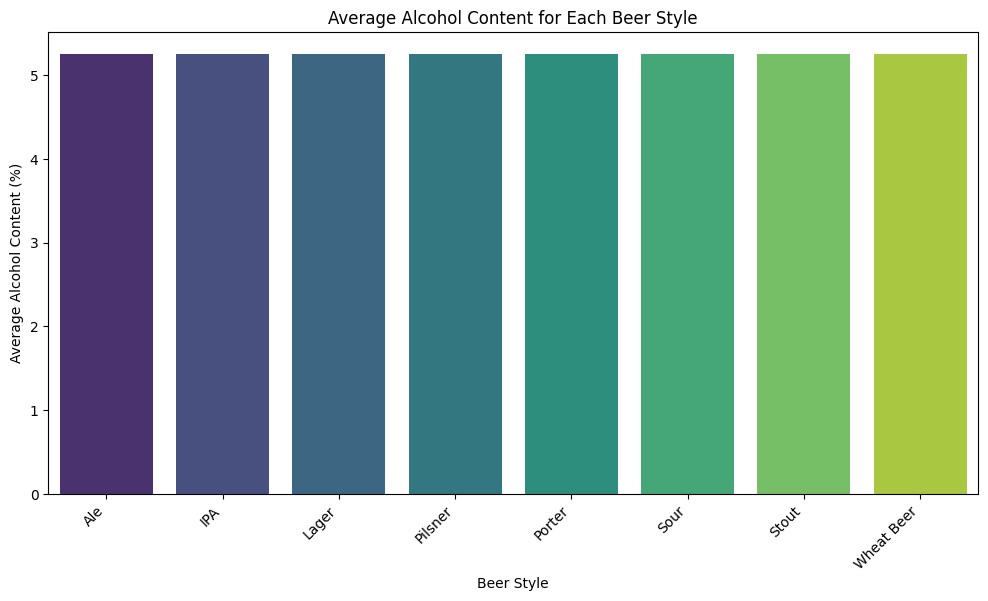

Total elapsed time: 0.7379856109619141 seconds


In [ ]:
start_time = time.time()

average_alcohol_by_style = sampled_mdf.groupby('Beer_Style')['Alcohol_Content'].mean().reset_index()

# Print the calculated averages
print(average_alcohol_by_style)

# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Beer_Style', y='Alcohol_Content', data=average_alcohol_by_style, palette='viridis')
plt.title('Average Alcohol Content for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average Alcohol Content (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Calculate the average pH level for each beer style

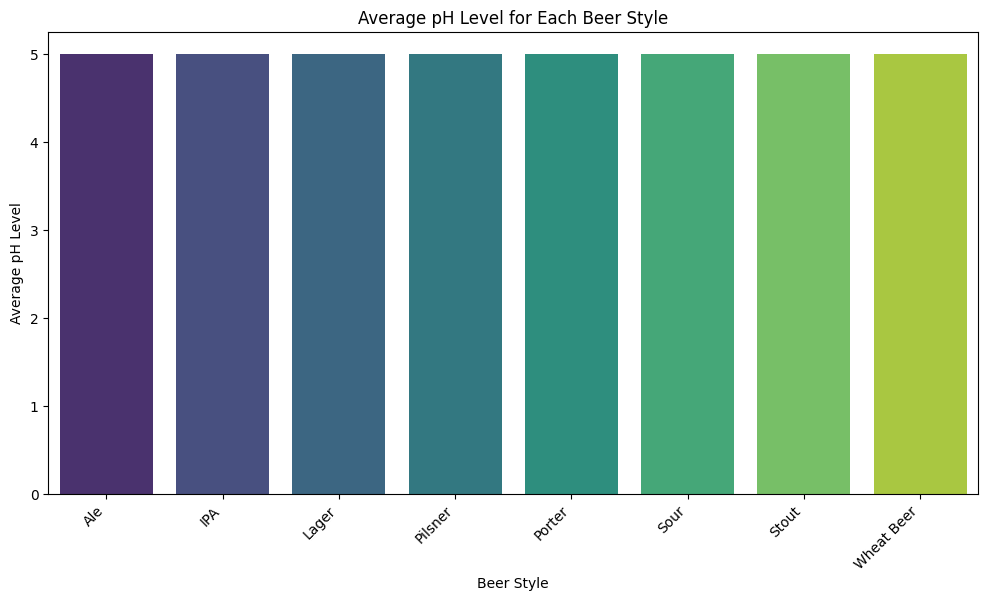

Total elapsed time: 0.7187867164611816 seconds


In [ ]:
start_time = time.time()

# Calculate the average pH level for each beer style
average_ph_by_style = sampled_mdf.groupby('Beer_Style', observed=False)['pH_Level'].mean().reset_index()

# Visualize the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Beer_Style', y='pH_Level', data=average_ph_by_style, palette='viridis')
plt.title('Average pH Level for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Average pH Level')
plt.xticks(rotation=45, ha='right')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Visualize the most common packaging type for each beer style using a countplot

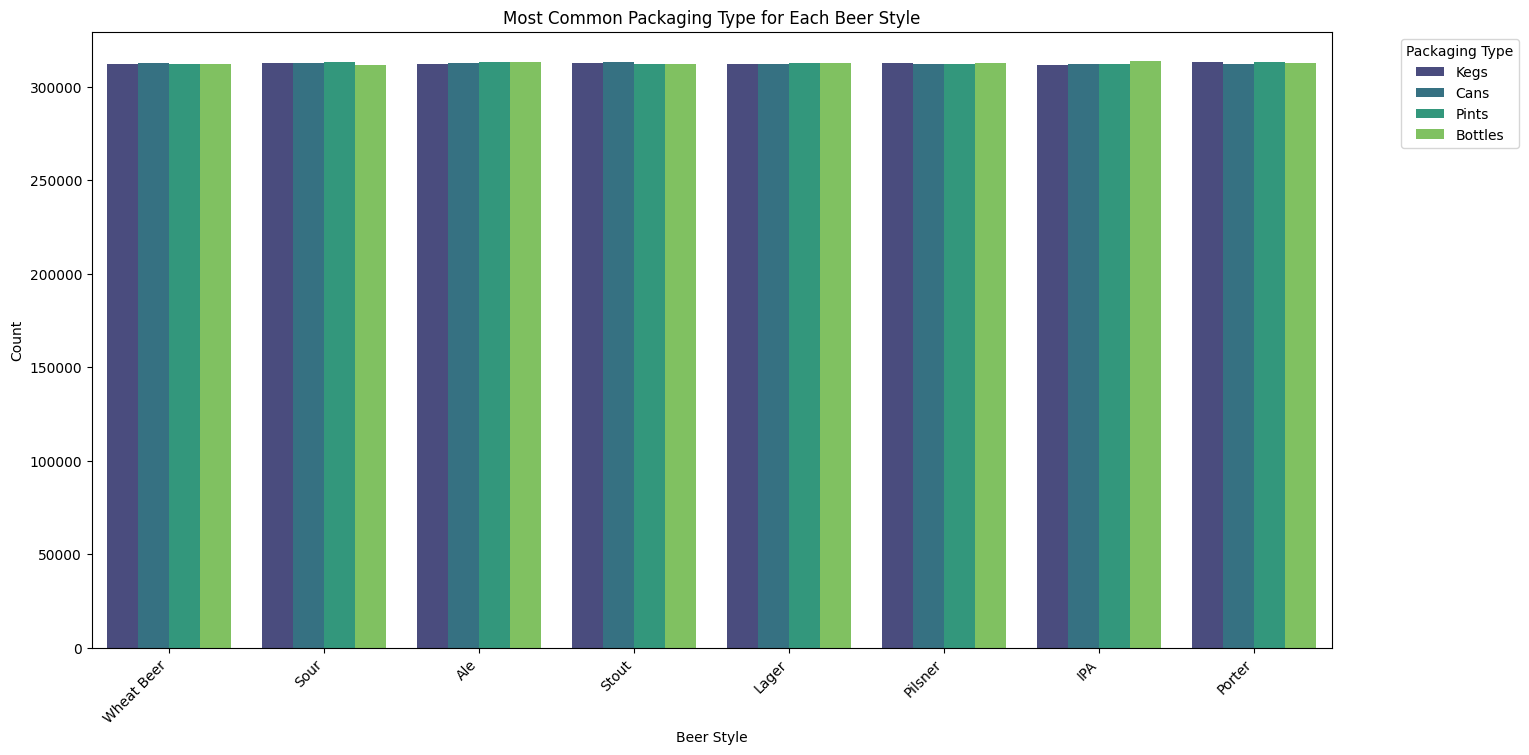

Total elapsed time: 10.660752296447754 seconds


In [ ]:
start_time = time.time()

# Visualize the most common packaging type for each beer style using a countplot
plt.figure(figsize=(16, 8))
sns.countplot(x='Beer_Style', hue='SKU', data=sampled_mdf, palette='viridis')
plt.title('Most Common Packaging Type for Each Beer Style')
plt.xlabel('Beer Style')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Packaging Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Scatter plot of Fermentation Time vs Temperature with Beer_Style

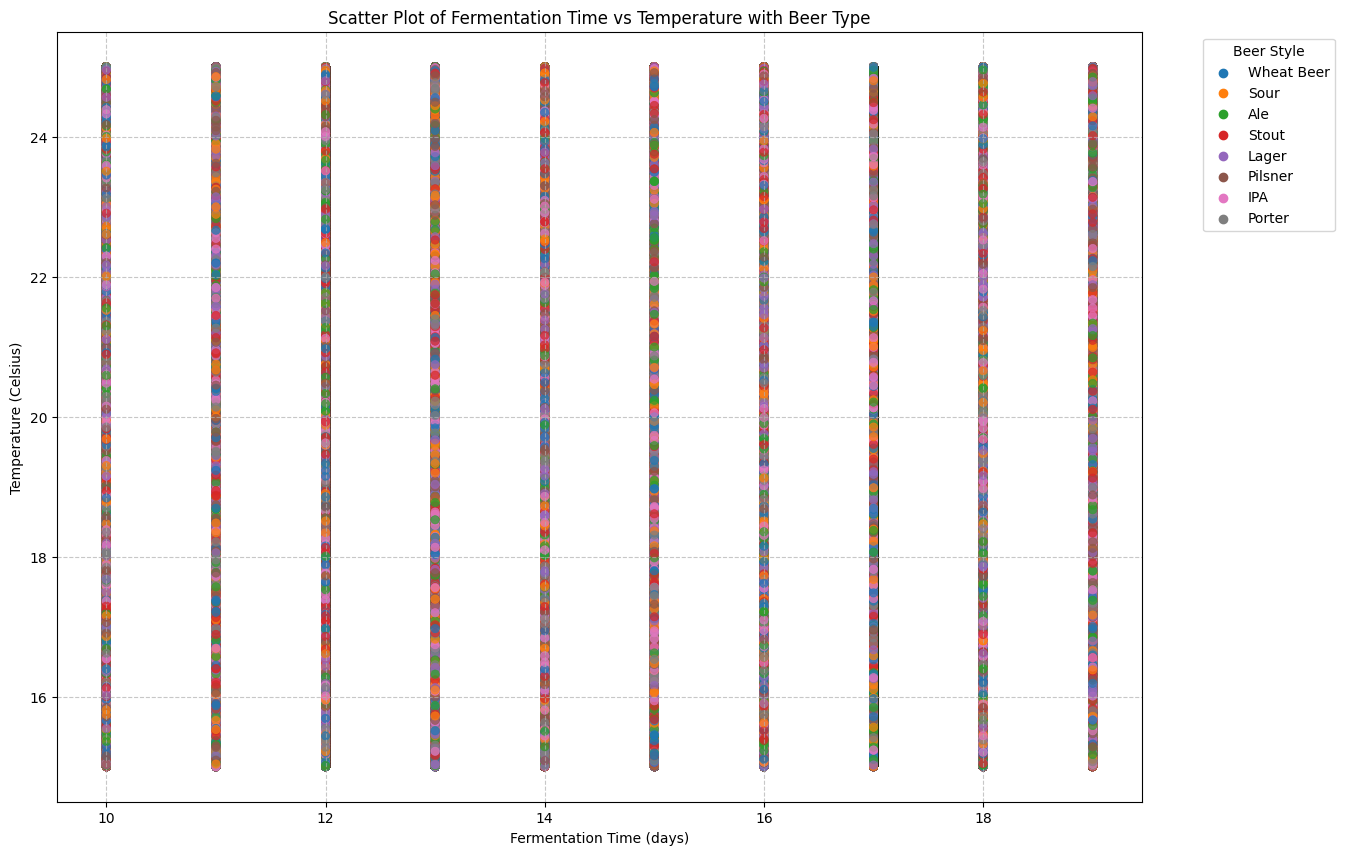

Total elapsed time: 188.15723848342896 seconds


In [ ]:
start_time = time.time()

# Scatter plot of Fermentation Time vs Temperature with Beer_Style
plt.figure(figsize=(14, 10))
sns.scatterplot(x='Fermentation_Time', y='Temperature', hue='Beer_Style', data=sampled_mdf, alpha=0.7, palette='tab10', edgecolor=None)
plt.title('Scatter Plot of Fermentation Time vs Temperature with Beer Type')
plt.xlabel('Fermentation Time (days)')
plt.ylabel('Temperature (Celsius)')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

## Create a heatmap of the correlation matrix

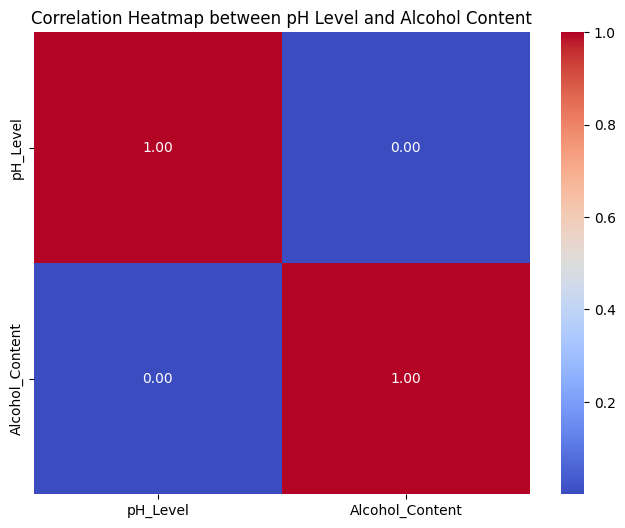

Total elapsed time: 0.45508432388305664 seconds


In [ ]:
start_time = time.time()

# Calculate the correlation matrix
correlation_matrix = sampled_mdf[['pH_Level', 'Alcohol_Content']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between pH Level and Alcohol Content')
plt.show()

end_time = time.time()
elapsed_time = end_time - start_time
print(f"Total elapsed time: {elapsed_time} seconds")

In [ ]:
from scipy import stats

start_time = time.time()

# Assuming 'Beer_Style' is a non-numeric column, you may want to exclude it from correlation
numeric_columns = sampled_mdf.select_dtypes(include=['number']).columns
correlation_matrix = sampled_mdf[numeric_columns].corr()

numerical_stats = sampled_mdf.describe()

mean_value = sampled_mdf['Fermentation_Time'].mean()
median_value = sampled_mdf['Fermentation_Time'].median()
std_deviation = sampled_mdf['Fermentation_Time'].std()

skewness = sampled_mdf['Gravity'].skew()
kurtosis = sampled_mdf['Gravity'].kurt()

t_statistic, p_value = stats.ttest_1samp(sampled_mdf['Quality_Score'], popmean=5)

beer_style_counts = sampled_mdf['Beer_Style'].value_counts()

grouped_by_style = sampled_mdf.groupby('Beer_Style')[['Fermentation_Time', 'Gravity']].mean()

end_time = time.time()
elapsed_time = end_time - start_time

print("Descriptive Statistics:")
print(numerical_stats)
print("\nCorrelation Matrix:")
print(correlation_matrix)
print("\nMean Fermentation Time:", mean_value)
print("Median Fermentation Time:", median_value)
print("Standard Deviation Fermentation Time:", std_deviation)
print("\nSkewness Gravity:", skewness)
print("Kurtosis Gravity:", kurtosis)
print("\nT-Statistic and P-Value for Quality Score:", t_statistic, p_value)
print("\nBeer Style Counts:")
print(beer_style_counts)
print("\nGrouped by Beer Style:")
print(grouped_by_style)

print("\nTime taken to run the code:", elapsed_time, "seconds")

Descriptive Statistics:
           Batch_ID  Fermentation_Time   Temperature      pH_Level  \
count  1.000000e+07       1.000000e+07  1.000000e+07  1.000000e+07   
mean   5.000000e+06       1.450090e+01  1.999990e+01  4.999941e+00   
std    2.886751e+06       2.872006e+00  2.887030e+00  2.886376e-01   
min    0.000000e+00       1.000000e+01  1.500000e+01  4.500000e+00   
25%    2.500000e+06       1.200000e+01  1.749984e+01  4.750040e+00   
50%    5.000000e+06       1.500000e+01  1.999977e+01  4.999885e+00   
75%    7.499999e+06       1.700000e+01  2.250076e+01  5.249937e+00   
max    9.999999e+06       1.900000e+01  2.500000e+01  5.500000e+00   

            Gravity  Alcohol_Content    Bitterness         Color  \
count  1.000000e+07     1.000000e+07  1.000000e+07  1.000000e+07   
mean   1.055003e+00     5.249709e+00  3.949620e+01  1.199935e+01   
std    1.443465e-02     4.329614e-01  1.154557e+01  4.321170e+00   
min    1.030000e+00     4.500000e+00  2.000000e+01  5.000000e+00   
25%  